# QF 627 Extras - Financial Analytics
## Problem Set `6` | `Questions`

> Hi Team! 👋

> The current problem set contains three sets of questions. Of these, two focus on applying synthetic control methods. The third question is designed to give you practice in identifying the most appropriate causal inference method from econometrics.

> As always, these questions are meant to deepen your understanding and support your preparation for the final assessment. You're encouraged to approach them using your own reasoning and effort, rather than simply relying on generative AI tools. While it’s fine to seek help from GenAI as part of the learning process, solely relying on it won't lead you to valid solutions—as you may have already experienced—nor will it serve your long-term learning and growth.

> This is a practice set, so there is no strict time limit. Feel free to take the opportunity to experiment, iterate, and learn through trial and error. Break problems down into smaller steps, try out simulations, and document your thinking process. Solving mathematical, quantitative, or analytics problems—especially in real-world contexts—is not about instantly arriving at the correct answer. It's about working through the complexity to develop your own solution. That’s where real learning happens.

> As some of you may recall from behavioral finance, natural (human) intelligence systems tend to have myopic time preferences. While AI-generated answers may provide quick assistance with weekly problem sets, they don’t prepare you for real-world decision-making or for success in our final assessment session. Rome, after all, wasn’t built in a day—true excellence takes time, commitment, and effort. Many aspire to be great, but few are willing to do what it takes to truly get there.

> Once again, I appreciate the effort you're putting into these questions. I look forward to reading your work and supporting your continued learning journey.

> Enjoy the process 🤗

### <font color = green> Activation of necessary libraries for setting your print options

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

### <mark>Import the below function provided by Prof. Roh into your working environment to enable algorithmic decision aids based on causal inference methods.</mark>

In [2]:
def would_you_recommend_causal_inference_method():
    print("Welcome to the Causal Inference Recommender architected by Prof. Roh :)")
    print("Please answer to the following questions with either 'yes' or 'no'.\n")

    # Question 1. RCT Feasibility (from observation to intervention)
    can_randomized =\
    (
        input("Question 1: Can we RANDOMIZE the treatment assignment? (yes / no): ")
        .strip()
        .lower()
    )
    
    if can_randomized == "yes":
        print("\nRecommended Method: **RCTs (Randomized Controlled Trials)**")
        return

    # Question 2. Threshold for RDD
    has_threshold =\
    (input("Question 2: Is there a threshold that assigns treatment (e.g., cut-off) (yes / no): ?")
     .strip()
     .lower()
    )
    
    if has_threshold == "yes":
        print("\nRecommended Method: **RDD (Regression Discontinuity Design)")
        return

    # Question 3. Check for Panel (vs. Cross-sectional) or Time-Series Data
    has_panel_data =\
    (input("Question 3: Do we have panel (longitudinal) or repeated Cross-Sectional Data over Time? (yes / no): ")
     .strip()
     .lower()
    )
    
    if has_panel_data == "yes":
        # contingency

        # Question 4. Do we have single or multiple treated units
        single_treated =\
        (
         input("Question 4: Do you have ONLY ONE treated unit (e.g., one city, one district)? (yes / no): ")
            .strip()
            .lower()
        )
        
        if single_treated == "yes":
            
            parallel_trends =\
            (
                input("Question 5: Are we confident the 'parallel trends' assumption would hold if you used a DiD? (yes / no): ")
                .strip()
                .lower()
            )

            if parallel_trends == "yes":
                print("\nParallel trends might hold, but you still only have ONE TREATED UNIT...")
                print("\nRecommended Method: **Difference-in-Differences is fine.**"
                     )
            else:
                print("\nSince parallel trends are questionable and there's only ONE TREATED UNIT...")
                print("\nRecommended Method: **Synthetic Control**")
            return

        else: 
            parallel_trends = input("Question 5: Can we assume paraell trends with multiple treated units? (yes / no ): ").strip().lower()
            if parallel_trends == "yes":
                print("\nRecommended Method: **Difference-in-Differences (DiD) ** ")
                return
            else: 
                print("\nParallel trends are questionable for multiple treated units.")
                print("\nTeam, you should consider more advanced methods as follows:")
                print("\n - Matching along with DiD (to align pre-trends on a matched sample.")
                print("\n - Synthetic Control for subsets if feasible")
                print("\n - More advanced methods ... call Prof. Roh :)")
                return

    else: 
        print("\n Recommended Method: **Matching** (Propensity Scoring and Inverse Probability Weights (**IPW**).")
        return

## <font color = red> Below, you will find `three larger sets` of questions. 
    
## <font color = purple> Please ensure that you demonstrate the workflow of your problem-solving process for these analytics questions. 
    
## <font color = purple> Specifically, follow these steps: import → wrangle → EDA → further wrangle (if necessary) → visualize and/or model → refine the model and/or visualization → report.

## ❓ <a id = "top"> List of Analytic Questions </a> ❓

## [Q1. Causal Effects of Brexit on the UK’s Economy](#p1)

> ### <font color = red> Use Synthetic Control </font>

## [Q2. Fiscal Policy 101: Resolving the Debate by Assessing the Effects of Minimum Wage Policy](#p2)

> ### <font color = red> Identify the econometric method of causal inference that would be valid for addressing the given problem.  </font>

## [Q3. Economic Impact of German Reunification](#p3)

> ### <font color = red> Again, Use Synthetic Control </font>

## <a id = "p1"></a><font color = blue> 👉 Big Questions 1</font>  [back to table of contents](#top)
    
### <font color = green> BUSINESS CONTEXT & ANALYTIC QUESTION

    Synthetic Control Calculations

> You are tasked with estimating the causal effect of Brexit on the UK using normalized GDP as the outcome variable, through the application of the Synthetic Control Method.

### Model Specifications

> Conduct your analysis under the following two model specifications:

- `Model A`: Use all 16 countries in the dataset to construct the synthetic control.

- `Model B`: Use a subset of countries selected based on domain knowledge or macroeconomic similarity to the UK.

    Note: As in previous questions, data wrangling is critical to ensure proper alignment of time periods, normalization of variables, and consistency across country panels.

### Visualizations of Causal Effects

> Please include the following plots in your report, using `lets-plot`:

- `Panel A`: Time-series plot of normalized GDP for all countries, with the UK highlighted in red.

- `Panel B`: Plot comparing actual UK GDP vs. synthetic UK GDP over time.

- `Panel C`: A causal impact plot displaying the difference between the actual UK GDP and the synthetic UK GDP over time—i.e., the estimated treatment effect of Brexit.

- `Panel D`: Bar chart or table summarizing the weights assigned to each donor country in the synthetic control construction.

### <mark> Dataset </mark> https://talktoroh.com/s/impact_of_brexit.csv

### <font color = red> IMPORT

In [3]:
data1 =\
(
    pd
    .read_csv("https://talktoroh.com/s/impact_of_brexit.csv")
)

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         53 non-null     object 
 1   Australia    53 non-null     float64
 2   Austria      53 non-null     float64
 3   Belgium      53 non-null     float64
 4   Canada       53 non-null     float64
 5   Denmark      53 non-null     float64
 6   Finland      53 non-null     float64
 7   France       53 non-null     float64
 8   Germany      53 non-null     float64
 9   Iceland      53 non-null     float64
 10  Luxemburg    53 non-null     float64
 11  Netherlands  53 non-null     float64
 12  New_Zealand  53 non-null     float64
 13  Norway       53 non-null     float64
 14  Sweden       53 non-null     float64
 15  Switzerland  53 non-null     float64
 16  UK           53 non-null     float64
dtypes: float64(16), object(1)
memory usage: 7.2+ KB


In [4]:
data1.head(10)

,Time,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Iceland,Luxemburg,Netherlands,New_Zealand,Norway,Sweden,Switzerland,UK
0,2009-01-01,3.84048,0.802836,0.94117,16.93824,4.50096,0.51052,5.05450,6.63471,5.18157,0.114836,1.634391,0.47336,7.78753,10.32220,1.476532,4.61881
1,2009-04-01,3.86954,0.796545,0.94162,16.75340,4.41372,0.50829,5.05375,6.64530,5.16171,0.116259,1.634432,0.47916,7.71903,10.32867,1.485509,4.60431
2,2009-07-01,3.88115,0.799937,0.95352,16.82878,4.42898,0.51299,5.06237,6.68237,5.24132,0.118747,1.640982,0.48188,7.72400,10.32328,1.502506,4.60722
3,2009-10-01,3.91028,0.803823,0.96117,17.02503,4.43300,0.50903,5.09832,6.73155,5.22482,0.119302,1.650866,0.48805,7.72812,10.37107,1.515139,4.62152
4,2010-01-01,3.92716,0.800510,0.96615,17.23041,4.47128,0.51413,5.11625,6.78621,4.91128,0.121414,1.647748,0.49349,7.87891,10.64833,1.525864,4.65380
5,2010-04-01,3.95387,0.811277,0.97567,17.32057,4.50184,0.52833,5.14098,6.93903,5.10614,0.122733,1.654981,0.49609,7.79516,10.86674,1.538485,4.70655
6,2010-07-01,3.98175,0.818550,0.97974,17.44332,4.57321,0.52616,5.17273,6.99577,5.00671,0.120794,1.662293,0.48887,7.60172,10.99898,1.547523,4.73954
7,2010-10-01,4.01663,0.828113,0.98469,17.63825,4.56292,0.53721,5.20808,7.05251,5.19581,0.121695,1.681046,0.48355,7.81512,11.17711,1.559345,4.74526
8,2011-01-01,4.00460,0.835229,0.98943,17.77148,4.57286,0.54021,5.26173,7.18926,4.98014,0.123155,1.690748,0.49175,7.82243,11.21731,1.569360,4.76720
9,2011-04-01,4.05656,0.837287,0.99148,17.80610,4.61870,0.53927,5.25703,7.19607,5.11759,0.121965,1.689237,0.49628,7.79009,11.25308,1.576716,4.77202


### <font color = red> WRANGLE </font>

In [5]:
(
    data1
    .isnull()
    .sum()
)

Time           0
Australia      0
Austria        0
Belgium        0
Canada         0
Denmark        0
Finland        0
France         0
Germany        0
Iceland        0
Luxemburg      0
Netherlands    0
New_Zealand    0
Norway         0
Sweden         0
Switzerland    0
UK             0
dtype: int64

In [6]:
data1_long =\
(
    pd
    .melt(data1,
          id_vars=['Time'],
          var_name='country',
          value_name='gdp_norm')
)

data1_long

,Time,country,gdp_norm
0,2009-01-01,Australia,3.84048
1,2009-04-01,Australia,3.86954
2,2009-07-01,Australia,3.88115
3,2009-10-01,Australia,3.91028
4,2010-01-01,Australia,3.92716
...,...,...,...
843,2021-01-01,UK,5.23440
844,2021-04-01,UK,5.52521
845,2021-07-01,UK,5.57700
846,2021-10-01,UK,5.64812


In [7]:
data1_long['Time'] =\
(
    pd
    .to_datetime(data1_long['Time'])
)

pre_brexit_mask =\
(
    (data1_long['Time'] >= '2009-01-01') & (data1_long['Time'] <= '2020-01-01')
)
pre_brexit_mask

0       True
1       True
2       True
3       True
4       True
       ...  
843    False
844    False
845    False
846    False
847    False
Name: Time, Length: 848, dtype: bool

In [8]:
data1_pre_brexit =\
(
    data1_long
    [pre_brexit_mask]
    .copy()
)

data1_pre_brexit

,Time,country,gdp_norm
0,2009-01-01,Australia,3.84048
1,2009-04-01,Australia,3.86954
2,2009-07-01,Australia,3.88115
3,2009-10-01,Australia,3.91028
4,2010-01-01,Australia,3.92716
...,...,...,...
835,2019-01-01,UK,5.62033
836,2019-04-01,UK,5.62779
837,2019-07-01,UK,5.65362
838,2019-10-01,UK,5.65109


In [9]:
uk_data =\
(
    data1_long
    [data1_long['country'] == 'UK']
    .copy()
)

uk_data

,Time,country,gdp_norm
795,2009-01-01,UK,4.61881
796,2009-04-01,UK,4.60431
797,2009-07-01,UK,4.60722
798,2009-10-01,UK,4.62152
799,2010-01-01,UK,4.65380
800,2010-04-01,UK,4.70655
801,2010-07-01,UK,4.73954
802,2010-10-01,UK,4.74526
803,2011-01-01,UK,4.76720
804,2011-04-01,UK,4.77202


### <font color = red> Exploratory Data Analysis </font>

In [10]:
(
    data1_pre_brexit
    .groupby('country')
    ['gdp_norm']
    .describe()
)

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Australia,45.0,4.452784,0.373861,3.840480,4.155760,4.452090,4.756270,5.050360
Austria,45.0,0.863725,0.040474,0.796545,0.842650,0.853993,0.895741,0.936745
Belgium,45.0,1.030513,0.049614,0.941170,0.997220,1.023760,1.070190,1.125130
Canada,45.0,19.068432,1.306846,16.753400,18.193920,19.310050,20.131650,21.232070
Denmark,45.0,4.826554,0.294557,4.413720,4.595670,4.750300,5.119200,5.333480
Finland,45.0,0.540342,0.019935,0.508290,0.527140,0.537210,0.560480,0.575790
France,45.0,5.421821,0.226175,5.053750,5.286060,5.395370,5.560050,5.849200
Germany,45.0,7.489514,0.444925,6.634710,7.236160,7.469940,7.920080,8.135320
Iceland,45.0,5.790171,0.653246,4.911280,5.217880,5.598340,6.416120,6.978840


### <font color = red> Visualization or Modeling </font>

#### Model A

In [11]:
donors =\
(
    [c for c in data1_pre_brexit['country'].unique() if c != 'UK']
)

donors

['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Iceland',
 'Luxemburg',
 'Netherlands',
 'New_Zealand',
 'Norway',
 'Sweden',
 'Switzerland']

In [12]:
pre_brexit_times =\
(
    data1_pre_brexit
    ['Time']
    .unique()
)

pre_brexit_times

<DatetimeArray>
['2009-01-01 00:00:00', '2009-04-01 00:00:00', '2009-07-01 00:00:00',
 '2009-10-01 00:00:00', '2010-01-01 00:00:00', '2010-04-01 00:00:00',
 '2010-07-01 00:00:00', '2010-10-01 00:00:00', '2011-01-01 00:00:00',
 '2011-04-01 00:00:00', '2011-07-01 00:00:00', '2011-10-01 00:00:00',
 '2012-01-01 00:00:00', '2012-04-01 00:00:00', '2012-07-01 00:00:00',
 '2012-10-01 00:00:00', '2013-01-01 00:00:00', '2013-04-01 00:00:00',
 '2013-07-01 00:00:00', '2013-10-01 00:00:00', '2014-01-01 00:00:00',
 '2014-04-01 00:00:00', '2014-07-01 00:00:00', '2014-10-01 00:00:00',
 '2015-01-01 00:00:00', '2015-04-01 00:00:00', '2015-07-01 00:00:00',
 '2015-10-01 00:00:00', '2016-01-01 00:00:00', '2016-04-01 00:00:00',
 '2016-07-01 00:00:00', '2016-10-01 00:00:00', '2017-01-01 00:00:00',
 '2017-04-01 00:00:00', '2017-07-01 00:00:00', '2017-10-01 00:00:00',
 '2018-01-01 00:00:00', '2018-04-01 00:00:00', '2018-07-01 00:00:00',
 '2018-10-01 00:00:00', '2019-01-01 00:00:00', '2019-04-01 00:00:00',
 '20

In [13]:
X = []

for c in donors:
    (
        X
        .append(data1_pre_brexit
                [data1_pre_brexit['country'] == c]
                ['gdp_norm']
                .values)
    )

X =\
(
    np
    .column_stack(X)
)

X

array([[ 3.84 ,  0.803,  0.941, 16.938,  4.501,  0.511,  5.054,  6.635,
         5.182,  0.115,  1.634,  0.473,  7.788, 10.322,  1.477],
       [ 3.87 ,  0.797,  0.942, 16.753,  4.414,  0.508,  5.054,  6.645,
         5.162,  0.116,  1.634,  0.479,  7.719, 10.329,  1.486],
       [ 3.881,  0.8  ,  0.954, 16.829,  4.429,  0.513,  5.062,  6.682,
         5.241,  0.119,  1.641,  0.482,  7.724, 10.323,  1.503],
       [ 3.91 ,  0.804,  0.961, 17.025,  4.433,  0.509,  5.098,  6.732,
         5.225,  0.119,  1.651,  0.488,  7.728, 10.371,  1.515],
       [ 3.927,  0.801,  0.966, 17.23 ,  4.471,  0.514,  5.116,  6.786,
         4.911,  0.121,  1.648,  0.493,  7.879, 10.648,  1.526],
       [ 3.954,  0.811,  0.976, 17.321,  4.502,  0.528,  5.141,  6.939,
         5.106,  0.123,  1.655,  0.496,  7.795, 10.867,  1.538],
       [ 3.982,  0.819,  0.98 , 17.443,  4.573,  0.526,  5.173,  6.996,
         5.007,  0.121,  1.662,  0.489,  7.602, 10.999,  1.548],
       [ 4.017,  0.828,  0.985, 17.638,  

In [14]:
y =\
(
    data1_pre_brexit
    [data1_pre_brexit['country'] == 'UK']
    ['gdp_norm']
    .values
)

y

array([4.619, 4.604, 4.607, 4.622, 4.654, 4.707, 4.74 , 4.745, 4.767,
       4.772, 4.787, 4.793, 4.826, 4.823, 4.882, 4.87 , 4.892, 4.925,
       4.962, 4.988, 5.035, 5.076, 5.11 , 5.139, 5.172, 5.21 , 5.238,
       5.273, 5.297, 5.327, 5.351, 5.391, 5.426, 5.442, 5.466, 5.488,
       5.501, 5.531, 5.566, 5.584, 5.62 , 5.628, 5.654, 5.651, 5.508])

In [15]:
from scipy.optimize import minimize

def loss_A(w):
    return np.sum((y - X @ w)**2)

cons = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
bounds =\
(
    [(0, 1)]
    * X.shape[1]
)
w0 =\
(
    np
    .ones(X.shape[1])
    / X.shape[1]
)
res =\
(
    minimize(loss_A,
             w0,
             bounds=bounds,
             constraints=cons)
)
weights =\
(
    res
    .x
)

weights

array([2.215e-01, 0.000e+00, 0.000e+00, 0.000e+00, 8.066e-02, 2.477e-17,
       8.560e-02, 0.000e+00, 5.671e-02, 0.000e+00, 0.000e+00, 0.000e+00,
       1.649e-01, 9.045e-02, 3.002e-01])

In [16]:
post_brexit_mask = (data1_long['Time'] > '2020-01-01')
post_brexit_mask

0      False
1      False
2      False
3      False
4      False
       ...  
843     True
844     True
845     True
846     True
847     True
Name: Time, Length: 848, dtype: bool

In [17]:
X_post = []

for c in donors:
    (
        X_post
        .append(data1_long
                [post_brexit_mask & (data1_long['country'] == c)]
                ['gdp_norm']
                .values)
    )

X_post =\
(
    np
    .column_stack(X_post)
)

X_post

array([[ 4.693,  0.805,  0.963, 18.48 ,  4.96 ,  0.538,  4.763,  7.259,
         6.13 ,  0.14 ,  1.728,  0.595,  8.507, 12.251,  1.698],
       [ 4.857,  0.892,  1.077, 20.14 ,  5.275,  0.565,  5.638,  7.913,
         6.237,  0.152,  1.836,  0.679,  8.891, 13.156,  1.805],
       [ 5.016,  0.875,  1.076, 20.582,  5.281,  0.569,  5.589,  7.962,
         6.563,  0.154,  1.836,  0.672,  8.955, 13.145,  1.806],
       [ 5.106,  0.871,  1.09 , 20.807,  5.279,  0.568,  5.592,  7.845,
         6.428,  0.157,  1.838,  0.682,  8.952, 13.356,  1.802],
       [ 5.148,  0.909,  1.109, 20.642,  5.409,  0.577,  5.65 ,  7.996,
         6.743,  0.158,  1.907,  0.698,  9.005, 13.458,  1.837],
       [ 5.054,  0.94 ,  1.132, 20.912,  5.479,  0.582,  5.839,  8.059,
         6.672,  0.16 ,  1.936,  0.669,  9.368, 13.727,  1.872],
       [ 5.237,  0.932,  1.137, 21.247,  5.635,  0.586,  5.871,  8.057,
         6.821,  0.161,  1.95 ,  0.685,  9.379, 13.886,  1.875],
       [ 5.277,  0.947,  1.143, 21.408,  

In [18]:
synthetic_uk_pre =\
(
    X @ weights
)

synthetic_uk_pre

array([4.601, 4.591, 4.606, 4.624, 4.667, 4.699, 4.69 , 4.766, 4.764,
       4.787, 4.834, 4.839, 4.873, 4.888, 4.879, 4.89 , 4.917, 4.942,
       4.972, 5.001, 5.019, 5.046, 5.086, 5.118, 5.137, 5.182, 5.226,
       5.237, 5.247, 5.283, 5.297, 5.356, 5.371, 5.429, 5.464, 5.485,
       5.521, 5.563, 5.567, 5.595, 5.614, 5.637, 5.65 , 5.694, 5.61 ])

In [19]:
synthetic_uk_post =\
(
    X_post @ weights
    if X_post.size > 0
    else np.array([])
)

synthetic_uk_post

array([5.216, 5.536, 5.595, 5.625, 5.696, 5.788, 5.869, 5.858])

In [20]:
synthetic_uk =\
(
    np
    .concatenate([synthetic_uk_pre,
                  synthetic_uk_post])
)

synthetic_uk

array([4.601, 4.591, 4.606, 4.624, 4.667, 4.699, 4.69 , 4.766, 4.764,
       4.787, 4.834, 4.839, 4.873, 4.888, 4.879, 4.89 , 4.917, 4.942,
       4.972, 5.001, 5.019, 5.046, 5.086, 5.118, 5.137, 5.182, 5.226,
       5.237, 5.247, 5.283, 5.297, 5.356, 5.371, 5.429, 5.464, 5.485,
       5.521, 5.563, 5.567, 5.595, 5.614, 5.637, 5.65 , 5.694, 5.61 ,
       5.216, 5.536, 5.595, 5.625, 5.696, 5.788, 5.869, 5.858])

In [21]:
uk_full =\
(
    data1_long
    [data1_long['country'] == 'UK']
    .sort_values('Time')
)

uk_full

,Time,country,gdp_norm
795,2009-01-01,UK,4.61881
796,2009-04-01,UK,4.60431
797,2009-07-01,UK,4.60722
798,2009-10-01,UK,4.62152
799,2010-01-01,UK,4.65380
800,2010-04-01,UK,4.70655
801,2010-07-01,UK,4.73954
802,2010-10-01,UK,4.74526
803,2011-01-01,UK,4.76720
804,2011-04-01,UK,4.77202


In [22]:
years_full =\
(
    uk_full
    ['Time']
    .values
)

years_full

array(['2009-01-01T00:00:00.000000000', '2009-04-01T00:00:00.000000000',
       '2009-07-01T00:00:00.000000000', '2009-10-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2010-04-01T00:00:00.000000000',
       '2010-07-01T00:00:00.000000000', '2010-10-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000', '2011-04-01T00:00:00.000000000',
       '2011-07-01T00:00:00.000000000', '2011-10-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2012-04-01T00:00:00.000000000',
       '2012-07-01T00:00:00.000000000', '2012-10-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2013-04-01T00:00:00.000000000',
       '2013-07-01T00:00:00.000000000', '2013-10-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2014-04-01T00:00:00.000000000',
       '2014-07-01T00:00:00.000000000', '2014-10-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
       '2015-07-01T00:00:00.000000000', '2015-10-01

#### Model B

In [23]:
subset_donors =\
(
    ['Australia',
     'Canada',
     'France',
     'Germany',
     'Netherlands']
)

X_B = []

for c in subset_donors:
    (
        X_B
        .append(data1_pre_brexit
                [data1_pre_brexit['country'] == c]
                ['gdp_norm']
                .values)
    )
    
X_B =\
(
    np
    .column_stack(X_B)
)

X_B

array([[ 3.84 , 16.938,  5.054,  6.635,  1.634],
       [ 3.87 , 16.753,  5.054,  6.645,  1.634],
       [ 3.881, 16.829,  5.062,  6.682,  1.641],
       [ 3.91 , 17.025,  5.098,  6.732,  1.651],
       [ 3.927, 17.23 ,  5.116,  6.786,  1.648],
       [ 3.954, 17.321,  5.141,  6.939,  1.655],
       [ 3.982, 17.443,  5.173,  6.996,  1.662],
       [ 4.017, 17.638,  5.208,  7.053,  1.681],
       [ 4.005, 17.771,  5.262,  7.189,  1.691],
       [ 4.057, 17.806,  5.257,  7.196,  1.689],
       [ 4.112, 18.052,  5.283,  7.26 ,  1.689],
       [ 4.156, 18.194,  5.293,  7.236,  1.679],
       [ 4.195, 18.206,  5.294,  7.251,  1.676],
       [ 4.226, 18.265,  5.286,  7.266,  1.676],
       [ 4.252, 18.29 ,  5.298,  7.287,  1.669],
       [ 4.272, 18.328,  5.293,  7.254,  1.658],
       [ 4.29 , 18.492,  5.296,  7.221,  1.663],
       [ 4.309, 18.599,  5.332,  7.298,  1.66 ],
       [ 4.343, 18.751,  5.326,  7.339,  1.67 ],
       [ 4.377, 18.948,  5.362,  7.36 ,  1.68 ],
       [ 4.41 , 18.9

In [24]:
y_B =\
(
    data1_pre_brexit
    [data1_pre_brexit['country'] == 'UK']
    ['gdp_norm']
    .values
)

y_B

array([4.619, 4.604, 4.607, 4.622, 4.654, 4.707, 4.74 , 4.745, 4.767,
       4.772, 4.787, 4.793, 4.826, 4.823, 4.882, 4.87 , 4.892, 4.925,
       4.962, 4.988, 5.035, 5.076, 5.11 , 5.139, 5.172, 5.21 , 5.238,
       5.273, 5.297, 5.327, 5.351, 5.391, 5.426, 5.442, 5.466, 5.488,
       5.501, 5.531, 5.566, 5.584, 5.62 , 5.628, 5.654, 5.651, 5.508])

In [25]:
def loss_B(w):
    return np.sum((y_B - X_B @ w)**2)

cons = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
bounds =\
(
    [(0, 1)]
    * X_B.shape[1]
)
w0 =\
(
    np
    .ones(X_B.shape[1])
    / X_B.shape[1]
)
res_B =\
(
    minimize(loss_B,
             w0,
             bounds=bounds,
             constraints=cons)
)
weights_B =\
(
    res_B
    .x
)

weights_B

array([6.276e-01, 1.385e-02, 3.033e-01, 5.521e-02, 2.401e-17])

In [26]:
post_brexit_mask = (data1_long['Time'] > '2020-01-01')
post_brexit_mask

0      False
1      False
2      False
3      False
4      False
       ...  
843     True
844     True
845     True
846     True
847     True
Name: Time, Length: 848, dtype: bool

In [27]:
X_B_post = []

for c in subset_donors:
    (
        X_B_post
        .append(data1_long
                [post_brexit_mask & (data1_long['country'] == c)]
                ['gdp_norm']
                .values)
    )
    
X_B_post =\
(
    np
    .column_stack(X_B_post)
)

X_B_post

array([[ 4.693, 18.48 ,  4.763,  7.259,  1.728],
       [ 4.857, 20.14 ,  5.638,  7.913,  1.836],
       [ 5.016, 20.582,  5.589,  7.962,  1.836],
       [ 5.106, 20.807,  5.592,  7.845,  1.838],
       [ 5.148, 20.642,  5.65 ,  7.996,  1.907],
       [ 5.054, 20.912,  5.839,  8.059,  1.936],
       [ 5.237, 21.247,  5.871,  8.057,  1.95 ],
       [ 5.277, 21.408,  5.859,  8.121,  1.959]])

In [28]:
synthetic_uk_B_pre =\
(
    X_B @ weights_B
)

synthetic_uk_B_pre

array([4.544, 4.561, 4.574, 4.608, 4.63 , 4.664, 4.696, 4.734, 4.753,
       4.785, 4.834, 4.865, 4.891, 4.91 , 4.931, 4.941, 4.954, 4.982,
       5.006, 5.043, 5.068, 5.084, 5.112, 5.126, 5.157, 5.164, 5.2  ,
       5.223, 5.263, 5.277, 5.29 , 5.334, 5.361, 5.401, 5.449, 5.478,
       5.505, 5.545, 5.563, 5.582, 5.61 , 5.646, 5.673, 5.682, 5.561])

In [29]:
synthetic_uk_B_post =\
(
    X_B_post @ weights_B
    if X_B_post.size > 0
    else np.array([])
)

synthetic_uk_B_post

array([5.047, 5.475, 5.568, 5.622, 5.672, 5.678, 5.807, 5.834])

In [30]:
synthetic_uk_B =\
(
    np
    .concatenate([synthetic_uk_B_pre,
                  synthetic_uk_B_post])
)

synthetic_uk_B

array([4.544, 4.561, 4.574, 4.608, 4.63 , 4.664, 4.696, 4.734, 4.753,
       4.785, 4.834, 4.865, 4.891, 4.91 , 4.931, 4.941, 4.954, 4.982,
       5.006, 5.043, 5.068, 5.084, 5.112, 5.126, 5.157, 5.164, 5.2  ,
       5.223, 5.263, 5.277, 5.29 , 5.334, 5.361, 5.401, 5.449, 5.478,
       5.505, 5.545, 5.563, 5.582, 5.61 , 5.646, 5.673, 5.682, 5.561,
       5.047, 5.475, 5.568, 5.622, 5.672, 5.678, 5.807, 5.834])

### <font color = red> Modeling or Visualization </font> 

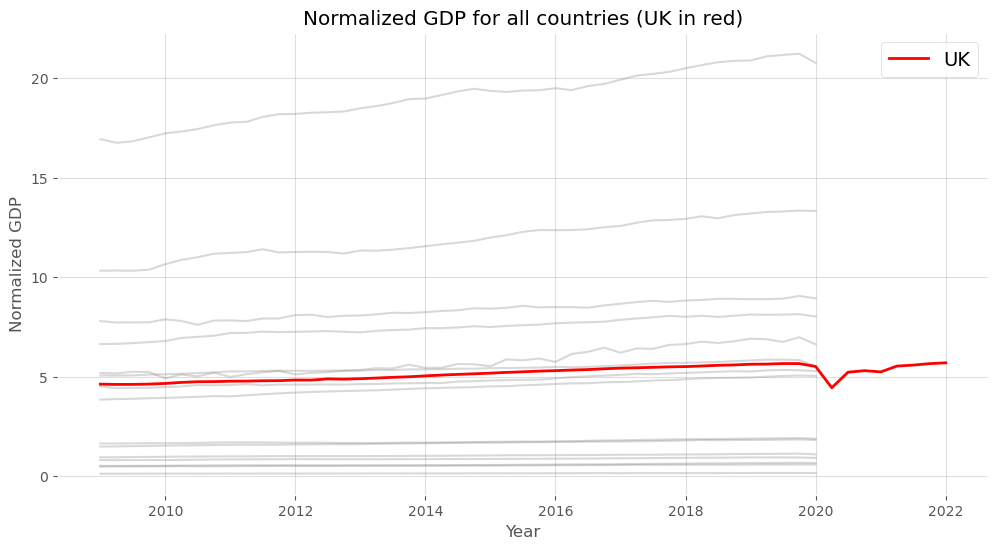

In [31]:
# Panel A: Normalized GDP for all countries (UK in red)
plt.figure(figsize=(12,6))
for c in data1_pre_brexit['country'].unique():
    plt.plot(
        data1_pre_brexit[data1_pre_brexit['country'] == c]['Time'],
        data1_pre_brexit[data1_pre_brexit['country'] == c]['gdp_norm'],
        color='grey', alpha=0.3
    )
plt.plot(
    uk_data['Time'], uk_data['gdp_norm'],
    color='red', label='UK', linewidth=2
)
plt.title('Normalized GDP for all countries (UK in red)')
plt.xlabel('Year')
plt.ylabel('Normalized GDP')
plt.legend()
plt.show()

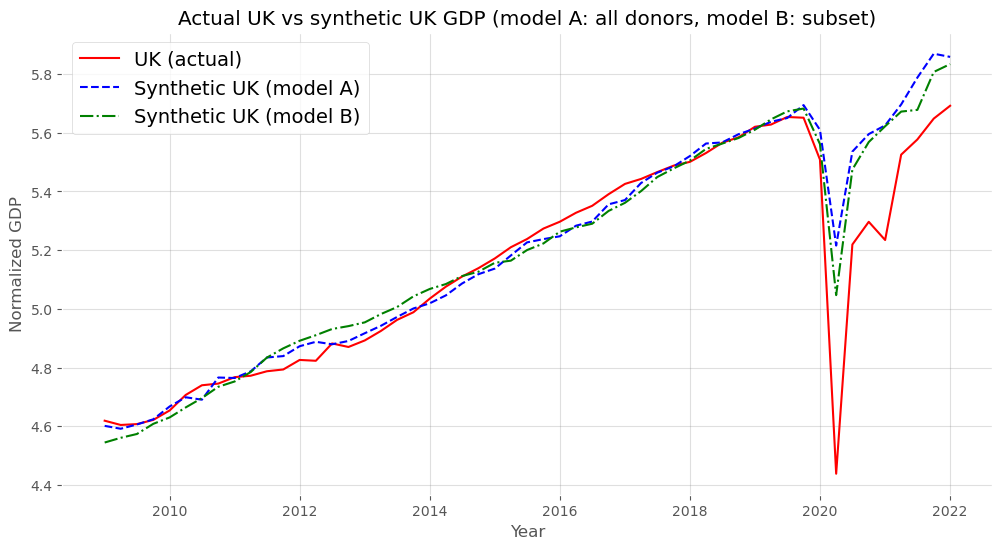

In [32]:
# Panel B: Actual UK vs Synthetic UK
plt.figure(figsize=(12,6))
plt.plot(years_full, uk_full['gdp_norm'].values, label='UK (actual)', color='red')
plt.plot(years_full[:len(synthetic_uk)], synthetic_uk, label='Synthetic UK (model A)', color='blue', linestyle='--')
plt.plot(years_full[:len(synthetic_uk_B)], synthetic_uk_B, label='Synthetic UK (model B)', color='green', linestyle='-.')
plt.title('Actual UK vs synthetic UK GDP (model A: all donors, model B: subset)')
plt.xlabel('Year')
plt.ylabel('Normalized GDP')
plt.legend()
plt.show()

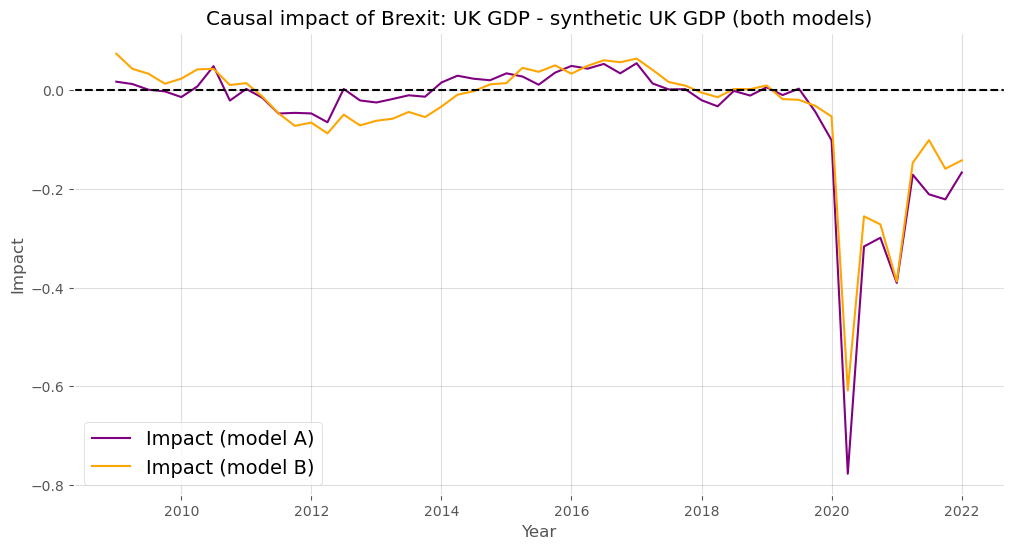

In [33]:
# Panel C: Causal impact (difference)
plt.figure(figsize=(12,6))
impact_A = uk_full['gdp_norm'].values[:len(synthetic_uk)] - synthetic_uk
impact_B = uk_full['gdp_norm'].values[:len(synthetic_uk_B)] - synthetic_uk_B
plt.plot(years_full[:len(synthetic_uk)], impact_A, color='purple', label='Impact (model A)')
plt.plot(years_full[:len(synthetic_uk_B)], impact_B, color='orange', label='Impact (model B)')
plt.title('Causal impact of Brexit: UK GDP - synthetic UK GDP (both models)')
plt.xlabel('Year')
plt.ylabel('Impact')
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.show()

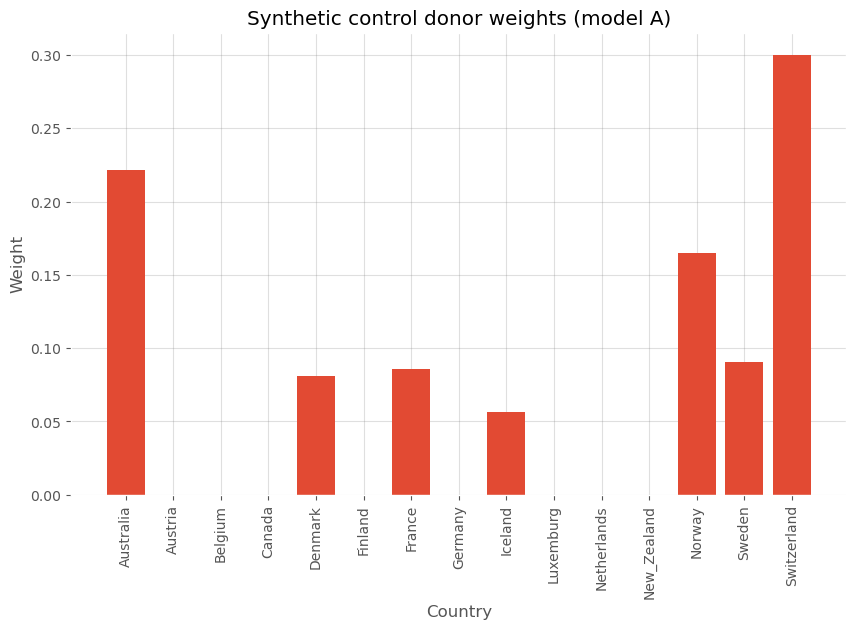

In [34]:
# Panel D1: Donor weights (model A)
plt.figure(figsize=(10,6))
plt.bar(donors, weights)
plt.title('Synthetic control donor weights (model A)')
plt.ylabel('Weight')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

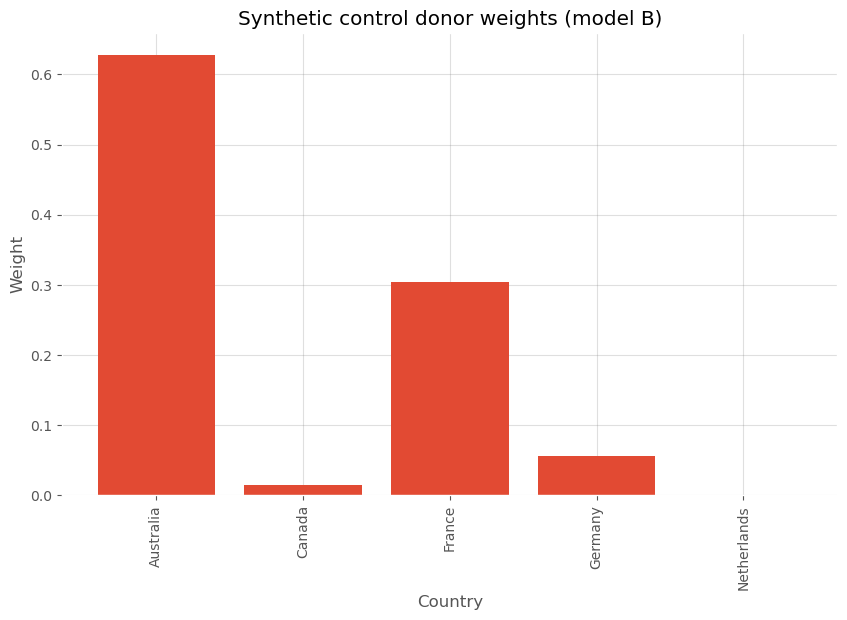

In [35]:
# Panel D2: Donor weights (model B)
plt.figure(figsize=(10,6))
plt.bar(subset_donors, weights_B)
plt.title('Synthetic control donor weights (model B)')
plt.ylabel('Weight')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

## <a id = "p2"></a><font color = blue> 👉 Big Questions 2</font>  [back to table of contents](#top)

### <font color = green> ANALYTICS CONTEXT

> The effect of minimum wage policies on employment is a central question in fiscal policy debates—one that can be rigorously examined using econometric methods of causal inference.

> As a data scientist at the International Monetary Fund (IMF), you are tasked with evaluating the impact of a minimum wage increase on employment in the fast-food industry, a sector that employs a large proportion of low-wage workers and is often directly affected by wage policy changes.

> Data were collected on the number of employees in 331 fast-food restaurants in New Jersey and 79 in Pennsylvania. Surveys were conducted in February 1992 (before the minimum wage was raised) and in November 1992 (after the minimum wage was raised).

> You have been provided with a dataset, which includes the necessary information to assess the impact of the minimum wage on employment. The dataset is stored in a `wide` format, meaning there is a single row for each unit (restaurant), and different columns for the outcomes and covariates in different years. The dataset includes the following variables (among others that we will not use):

#### Variables Collected

- `nj` – a dummy variable equal to 1 if the restaurant is located in New Jersey
- `emptot` – the total number of full-time employees in the pre-treatment period
- `emptot2` – the total number of full-time employees in the post-treatment period
- `wage_st` – the average starting wage in the restaurant in the pre-treatment period
- `wage_st2` – the average starting wage in the restaurant in the post-treatment period
- `pmeal` – the average price of a meal in the pre-treatment period
- `pmeal2` – the average price of a meal in the post-treatment period
- `co_owned` – a dummy variable equal to 1 if the restaurant was co-owned
- `bk` – a dummy variable equal to 1 if the restaurant was a Burger King
- `kfc` – a dummy variable equal to 1 if the restaurant was a KFC
- `wendys` – a dummy variable equal to 1 if the restaurant was a Wendy’s


### <mark> Dataset </mark> https://talktoroh.com/s/minimum_wage_policy_impact.csv

### <font color = red> IMPORT

In [36]:
data2 =\
(
    pd
    .read_csv("https://talktoroh.com/s/minimum_wage_policy_impact.csv")
)

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   co_owned  410 non-null    int64  
 1   southj    410 non-null    int64  
 2   centralj  410 non-null    int64  
 3   pa1       410 non-null    int64  
 4   pa2       410 non-null    int64  
 5   wage_st   390 non-null    float64
 6   hrsopen   410 non-null    float64
 7   wage_st2  389 non-null    float64
 8   hrsopen2  399 non-null    float64
 9   emptot    398 non-null    float64
 10  emptot2   396 non-null    float64
 11  nj        410 non-null    int64  
 12  pa        410 non-null    int64  
 13  bk        410 non-null    int64  
 14  kfc       410 non-null    int64  
 15  roys      410 non-null    int64  
 16  wendys    410 non-null    int64  
 17  pmeal     387 non-null    float64
 18  pmeal2    376 non-null    float64
 19  closed    410 non-null    int64  
dtypes: float64(8), int64(12)
memory 

In [37]:
data2.head(10)

,co_owned,southj,centralj,pa1,pa2,wage_st,hrsopen,wage_st2,hrsopen2,emptot,emptot2,nj,pa,bk,kfc,roys,wendys,pmeal,pmeal2,closed
0,0,0,0,1,0,NaN,16.5,4.30,16.5,40.50,24.0,0,1,1,0,0,0,2.58,NaN,0
1,0,0,0,1,0,NaN,13.0,4.45,13.0,13.75,11.5,0,1,0,1,0,0,4.26,4.25,0
2,1,0,0,1,0,NaN,10.0,5.00,11.0,8.50,10.5,0,1,0,1,0,0,4.02,4.02,0
3,1,0,0,1,0,5.00,12.0,5.25,12.0,34.00,20.0,0,1,0,0,0,1,3.48,2.58,0
4,1,0,0,1,0,5.50,12.0,4.75,12.0,24.00,35.5,0,1,0,0,0,1,3.29,2.80,0
5,1,0,0,1,0,5.00,12.0,NaN,12.0,20.50,NaN,0,1,0,0,0,1,2.59,NaN,0
6,0,0,0,0,1,5.00,18.0,4.75,18.0,70.50,29.0,0,1,1,0,0,0,2.86,2.84,0
7,0,0,0,0,1,5.00,24.0,5.00,24.0,23.50,36.5,0,1,1,0,0,0,2.85,2.89,0
8,1,0,0,0,1,5.25,10.0,5.00,11.0,11.00,11.0,0,1,0,1,0,0,3.78,4.10,0
9,1,0,0,1,0,5.00,10.0,5.00,10.5,9.00,8.5,0,1,0,1,0,0,3.99,3.95,0


### <font color = red> WRANGLE

In [38]:
(
    data2
    .isnull()
    .sum()
)

co_owned     0
southj       0
centralj     0
pa1          0
pa2          0
wage_st     20
hrsopen      0
wage_st2    21
hrsopen2    11
emptot      12
emptot2     14
nj           0
pa           0
bk           0
kfc          0
roys         0
wendys       0
pmeal       23
pmeal2      34
closed       0
dtype: int64

In [39]:
data2_clean =\
(
    data2
    .dropna(subset=['emptot',
                    'emptot2',
                    'wage_st',
                    'wage_st2',
                    'pmeal',
                    'pmeal2'])
)

data2_clean

,co_owned,southj,centralj,pa1,pa2,wage_st,hrsopen,wage_st2,hrsopen2,emptot,emptot2,nj,pa,bk,kfc,roys,wendys,pmeal,pmeal2,closed
3,1,0,0,1,0,5.00,12.0,5.25,12.0,34.00,20.00,0,1,0,0,0,1,3.48,2.58,0
4,1,0,0,1,0,5.50,12.0,4.75,12.0,24.00,35.50,0,1,0,0,0,1,3.29,2.80,0
6,0,0,0,0,1,5.00,18.0,4.75,18.0,70.50,29.00,0,1,1,0,0,0,2.86,2.84,0
7,0,0,0,0,1,5.00,24.0,5.00,24.0,23.50,36.50,0,1,1,0,0,0,2.85,2.89,0
8,1,0,0,0,1,5.25,10.0,5.00,11.0,11.00,11.00,0,1,0,1,0,0,3.78,4.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,1,0,0,0,0,4.95,12.0,5.25,11.0,9.00,23.75,1,0,0,1,0,0,4.25,4.21,0
406,1,0,0,0,0,4.75,11.0,5.25,14.0,9.75,17.50,1,0,0,1,0,0,4.25,4.31,0
407,1,0,0,0,0,4.25,19.0,5.05,18.0,24.50,20.50,1,0,0,0,1,0,3.26,3.21,0
408,0,0,0,0,0,4.75,12.5,5.05,12.5,14.00,20.50,1,0,0,0,0,1,4.07,4.27,0


In [40]:
data2_clean['d_employment'] =\
(
    data2_clean['emptot2']
    - data2_clean['emptot']
)

data2_clean['d_wage'] =\
(
    data2_clean['wage_st2']
    - data2_clean['wage_st']
)

data2_clean['d_pmeal'] =\
(
    data2_clean['pmeal2']
    - data2_clean['pmeal']
)

data2_clean

/var/folders/k1/7yl62fwx2879_758cjywcjrw0000gn/T/ipykernel_62716/3794686950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_clean['d_employment'] =\
/var/folders/k1/7yl62fwx2879_758cjywcjrw0000gn/T/ipykernel_62716/3794686950.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_clean['d_wage'] =\
/var/folders/k1/7yl62fwx2879_758cjywcjrw0000gn/T/ipykernel_62716/3794686950.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,co_owned,southj,centralj,pa1,pa2,wage_st,hrsopen,wage_st2,hrsopen2,emptot,...,bk,kfc,roys,wendys,pmeal,pmeal2,closed,d_employment,d_wage,d_pmeal
3,1,0,0,1,0,5.00,12.0,5.25,12.0,34.00,...,0,0,0,1,3.48,2.58,0,-14.00,0.25,-0.90
4,1,0,0,1,0,5.50,12.0,4.75,12.0,24.00,...,0,0,0,1,3.29,2.80,0,11.50,-0.75,-0.49
6,0,0,0,0,1,5.00,18.0,4.75,18.0,70.50,...,1,0,0,0,2.86,2.84,0,-41.50,-0.25,-0.02
7,0,0,0,0,1,5.00,24.0,5.00,24.0,23.50,...,1,0,0,0,2.85,2.89,0,13.00,0.00,0.04
8,1,0,0,0,1,5.25,10.0,5.00,11.0,11.00,...,0,1,0,0,3.78,4.10,0,0.00,-0.25,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,1,0,0,0,0,4.95,12.0,5.25,11.0,9.00,...,0,1,0,0,4.25,4.21,0,14.75,0.30,-0.04
406,1,0,0,0,0,4.75,11.0,5.25,14.0,9.75,...,0,1,0,0,4.25,4.31,0,7.75,0.50,0.06
407,1,0,0,0,0,4.25,19.0,5.05,18.0,24.50,...,0,0,1,0,3.26,3.21,0,-4.00,0.80,-0.05
408,0,0,0,0,0,4.75,12.5,5.05,12.5,14.00,...,0,0,0,1,4.07,4.27,0,6.50,0.30,0.20


### <font color = red> EDA

In [41]:
(
    data2_clean
    .groupby('nj')
    [['emptot',
      'emptot2',
      'd_employment',
      'wage_st',
      'wage_st2',
      'd_wage']]
    .describe()
)

emptot                                                       emptot2  \
    count       mean        std  min      25%   50%   75%   max   count   
nj                                                                        
0    61.0  23.598361  12.467397  7.5  15.5000  20.5  28.0  70.5    61.0   
1   256.0  20.031250   8.119482  5.0  14.4375  19.0  24.0  53.0   256.0   

               ... wage_st2       d_wage                                  \
         mean  ...      75%   max  count      mean       std   min   25%   
nj             ...                                                         
0   21.540984  ...     4.90  6.25   61.0 -0.042295  0.399213 -0.75 -0.25   
1   20.510742  ...     5.05  5.75  256.0  0.475860  0.336927 -0.57  0.30   

                     
     50%  75%   max  
nj                   
0   0.00  0.0  2.00  
1   0.55  0.8  1.17  

[2 rows x 48 columns]

In [42]:
(
    data2_clean
    .groupby('nj')
    ['d_employment']
    .mean()
)

nj
0   -2.057377
1    0.479492
Name: d_employment, dtype: float64

<Figure size 800x500 with 0 Axes>

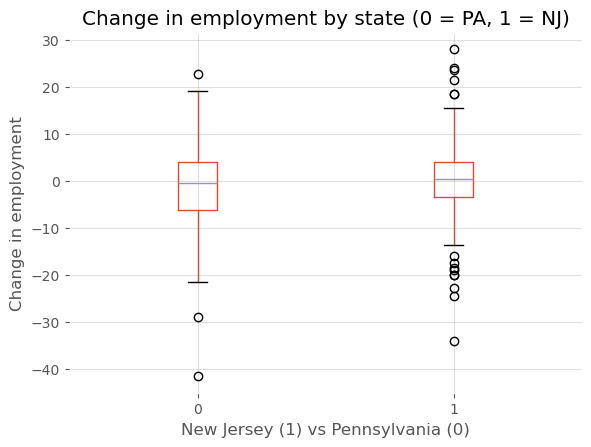

In [43]:
plt.figure(figsize=(8,5))
(
    data2_clean
    .boxplot(column='d_employment',
             by='nj')
)
plt.title('Change in employment by state (0 = PA, 1 = NJ)')
plt.suptitle('')
plt.xlabel('New Jersey (1) vs Pennsylvania (0)')
plt.ylabel('Change in employment')
plt.show()

### <font color = red> Using the function below, identify the appropriate econometric method for causal inference for each question.

```python
would_you_recommend_causal_inference_method()
```

### <font color = red> Model or Visualize

In [44]:
means =\
(
    data2_clean
    .groupby('nj')
    [['emptot',
      'emptot2']]
    .mean()
)

means

,emptot,emptot2
nj,,
0,23.598361,21.540984
1,20.031250,20.510742


In [45]:
did =\
(
    (means.loc[1, 'emptot2'] - means.loc[1, 'emptot'])
    - (means.loc[0, 'emptot2'] - means.loc[0, 'emptot'])
)

did

np.float64(2.536869236680328)

In [46]:
data2_long =\
(
    pd
    .melt(data2_clean.reset_index(),
          id_vars=['index', 'nj'],
          value_vars=['emptot', 'emptot2'],
          var_name='period',
          value_name='emptot_val')
)
data2_long['post'] =\
(
    (data2_long['period'] == 'emptot2')
    .astype(int)
)

data2_long

,index,nj,period,emptot_val,post
0,3,0,emptot,34.00,0
1,4,0,emptot,24.00,0
2,6,0,emptot,70.50,0
3,7,0,emptot,23.50,0
4,8,0,emptot,11.00,0
...,...,...,...,...,...
629,405,1,emptot2,23.75,1
630,406,1,emptot2,17.50,1
631,407,1,emptot2,20.50,1
632,408,1,emptot2,20.50,1


In [47]:
import statsmodels.formula.api as smf

model =\
(
    smf
    .ols('emptot_val ~ nj * post',
         data=data2_long)
    .fit()
)

(
    model
    .summary()
)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             emptot_val   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.001
Date:                Sun, 29 Jun 2025   Prob (F-statistic):             0.0300
Time:                        11:56:27   Log-Likelihood:                -2268.1
No. Observations:                 634   AIC:                             4544.
Df Residuals:                     630   BIC:                             4562.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.5984      1.112     21.221      0.000      21.415      25.782
nj            -3.5671      1.237     -2.883      0.004      -5.997      -1.137
post          -2.0574      1.573     -1.308      0.191      -5.146       1.031
nj:post        2.5369      1.750      1.450      0.148      -0.900       5.973
==============================================================================
Omnibus:                      126.607   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.099
Skew:                           1.081   Prob(JB):                     3.02e-60
Kurtosis:                       5.388   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color = red> Visualize or Model

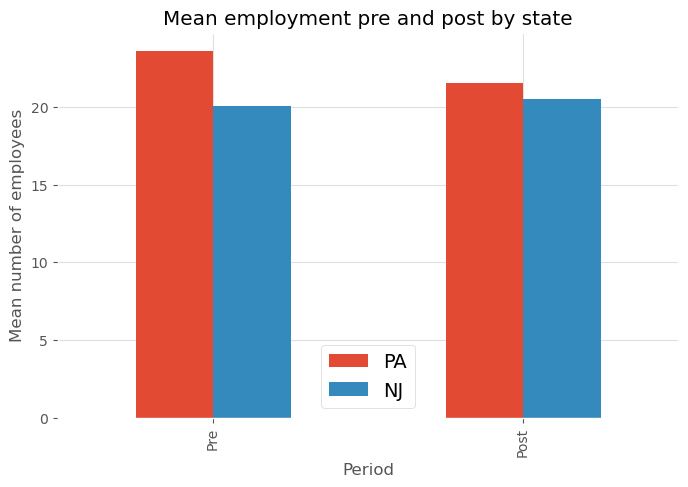

In [48]:
means_plot =\
(
    means
    .T
)
means_plot.index =\
(
    ['Pre',
     'Post']
)
means_plot.columns =\
(
    ['PA',
     'NJ']
)
means_plot.plot(kind='bar',
                figsize=(8,5))
plt.title('Mean employment pre and post by state')
plt.ylabel('Mean number of employees')
plt.xlabel('Period')
plt.show()

## <a id = "p3"></a><font color = blue> 👉 Big Questions 3</font>  [back to table of contents](#top)

### <font color = green> ANALYTICS CONTEXT
    
> Consider that you are a data scientist working at the World Bank. You are currently working on analyzing the economic impact of the 1990 German reunification. Specifically, you want to estimate the impact of the reunification on the GDP per capita of West Germany, by comparing the post-reunification trajectory of West Germany to a synthetic control region constructed from other countries.

#### Data collected:

- `code` – numeric country code uniquely identifying each country (e.g., 1 = USA, 2 = UK, etc.)
- `country` – name of country (e.g., "USA", "UK", "West Germany", etc.)
- `year` – year of observation (e.g., 1960, 1970, ..., 2000)
- `gdp` – GDP per capita (national income per person, in local currency or international dollars)
- `infrate` – inflation rate (%) (annual percentage change in consumer prices)
- `trade` – trade openness as a percentage of GDP (%) (sum of exports and imports divided by GDP, times 100)
- `schooling` – average years of schooling (mean years of education for the adult population)
- `invest60` – investment rate in the 1960s (%) (average gross capital formation as a percent of GDP, 1960–1969)
- `invest70` – investment rate in the 1970s (%) (average gross capital formation as a percent of GDP, 1970–1979)
- `invest80` – investment rate in the 1980s (%) (average gross capital formation as a percent of GDP, 1980–1989)
- `industry` – industry share (%) (share of industry in GDP, as a percentage)

### <mark> Dataset </mark> https://talktoroh.com/s/reunification_of_germany.csv

### <font color = red> Below are the lines of code that lead to an answer: </font>

In [49]:
data3 =\
(
    pd
    .read_csv("https://talktoroh.com/s/reunification_of_germany.csv")
)

data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   code       748 non-null    int64  
 1   country    748 non-null    object 
 2   year       748 non-null    int64  
 3   gdp        748 non-null    int64  
 4   infrate    727 non-null    float64
 5   trade      646 non-null    float64
 6   schooling  151 non-null    float64
 7   invest60   17 non-null     float64
 8   invest70   17 non-null     float64
 9   invest80   17 non-null     float64
 10  industry   541 non-null    float64
dtypes: float64(7), int64(3), object(1)
memory usage: 64.4+ KB


In [50]:
data3.head(10)

,code,country,year,gdp,infrate,trade,schooling,invest60,invest70,invest80,industry
0,1,USA,1960,2879,NaN,9.693181,43.799999,NaN,NaN,NaN,NaN
1,1,USA,1961,2929,1.075182,9.444655,NaN,NaN,NaN,NaN,NaN
2,1,USA,1962,3103,1.116071,9.429324,NaN,NaN,NaN,NaN,NaN
3,1,USA,1963,3227,1.214128,9.470706,NaN,NaN,NaN,NaN,NaN
4,1,USA,1964,3420,1.308615,9.725879,NaN,NaN,NaN,NaN,NaN
5,1,USA,1965,3667,1.668461,9.730347,43.799999,NaN,NaN,NaN,NaN
6,1,USA,1966,3974,2.991000,10.097592,NaN,NaN,NaN,NaN,NaN
7,1,USA,1967,4154,2.775636,10.208102,NaN,NaN,NaN,NaN,NaN
8,1,USA,1968,4494,4.217721,10.593937,NaN,NaN,NaN,NaN,NaN
9,1,USA,1969,4805,5.414701,10.635633,NaN,NaN,NaN,NaN,NaN


In [51]:
(
    data3
    .isnull()
    .sum()
)

code           0
country        0
year           0
gdp            0
infrate       21
trade        102
schooling    597
invest60     731
invest70     731
invest80     731
industry     207
dtype: int64

In [52]:
treated = 'West Germany'
donors =\
(
    data3['country']
    .unique()
    .tolist()
)
donors =\
(
    [c for c in donors if c not in [treated, 'Germany', 'East Germany']]
)

donors

['USA',
 'UK',
 'Austria',
 'Belgium',
 'Denmark',
 'France',
 'Italy',
 'Netherlands',
 'Norway',
 'Switzerland',
 'Japan',
 'Greece',
 'Portugal',
 'Spain',
 'Australia',
 'New Zealand']

In [53]:
pre_years =\
(
    data3
    [(data3['country'] == treated) & (data3['year'] < 1990)]
    ['year']
    .values
)

pre_years

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989])

In [54]:
post_years =\
(
    data3[(data3['country'] == treated) & (data3['year'] >= 1990)]
    ['year']
    .values
)

post_years

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003])

In [55]:
eda =\
(
    data3
    [data3['year'] < 1990]
    .groupby('country')['gdp']
    .describe()
)

eda

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Australia,30.0,7717.233333,4777.039818,2346.0,3500.00,6353.5,11531.00,17255.0
Austria,30.0,7465.200000,5189.282645,1796.0,2728.00,5884.5,11921.50,17768.0
Belgium,30.0,7321.366667,4970.039128,1782.0,2778.75,5926.5,11640.00,17345.0
Denmark,30.0,7957.400000,4924.986453,2329.0,3658.00,6343.0,11862.75,17418.0
France,30.0,7338.266667,4904.325592,1858.0,2977.00,5835.5,11634.00,17193.0
Greece,30.0,4980.133333,3334.738533,707.0,1807.25,4206.0,8120.50,11036.0
Italy,30.0,6979.133333,4851.518040,1620.0,2695.50,5420.5,11104.50,16875.0
Japan,30.0,6577.633333,4969.743562,1010.0,2223.75,5039.0,10606.25,17269.0
Netherlands,30.0,7657.866667,4863.743980,2111.0,3158.25,6432.0,11664.00,17387.0


In [56]:
X = []

for c in donors:
    (
        X
        .append(data3
                [(data3['country'] == c) & (data3['year'].isin(pre_years))]
                ['gdp']
                .values)
    )
    
X =\
(
    np
    .column_stack(X)
)

X

array([[ 2879,  2158,  1796,  1782,  2329,  1858,  1620,  2113,  1713,
         3387,  1010,   707,   728,  1074,  2373,  2545],
       [ 2929,  2216,  1899,  1883,  2485,  1959,  1763,  2111,  1823,
         3625,  1143,  1028,   783,  1201,  2346,  2659],
       [ 3103,  2276,  1977,  2018,  2665,  2099,  1900,  2275,  1905,
         3788,  1262,  1049,   848,  1335,  2539,  2713],
       [ 3227,  2386,  2074,  2122,  2700,  2205,  2021,  2360,  1991,
         3946,  1374,  1188,   905,  1467,  2717,  2866],
       [ 3420,  2534,  2224,  2288,  2980,  2367,  2093,  2566,  2112,
         4158,  1546,  1316,   979,  1554,  2873,  3001],
       [ 3667,  2660,  2336,  2414,  3177,  2526,  2205,  2739,  2268,
         4360,  1647,  1492,  1084,  1678,  2973,  3224],
       [ 3974,  2794,  2537,  2559,  3377,  2728,  2400,  2874,  2417,
         4575,  1889,  1634,  1170,  1841,  3230,  3481],
       [ 4154,  2923,  2668,  2719,  3580,  2915,  2624,  3078,  2620,
         4790,  2133,  175

In [57]:
y =\
(
    data3
    [(data3['country'] == treated) & (data3['year'].isin(pre_years))]
    ['gdp']
    .values
)

y

array([ 2284,  2388,  2527,  2610,  2806,  3005,  3168,  3241,  3571,
        3998,  4367,  4686,  5055,  5553,  6074,  6603,  7367,  8090,
        8928, 10067, 11083, 12115, 12761, 13519, 14481, 15291, 15998,
       16679, 17786, 18994])

In [58]:
def loss(w):
    return np.sum((y - X @ w)**2)

cons = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
bounds =\
(
    [(0, 1)]
    * X.shape[1]
)
w0 =\
(
    np.ones(X.shape[1])
    / X.shape[1]
)
res =\
(
    minimize(loss,
             w0,
             bounds=bounds,
             constraints=cons)
)
weights =\
(
    res
    .x
)

weights

array([0.081, 0.062, 0.084, 0.084, 0.062, 0.081, 0.081, 0.065, 0.081,
       0.065, 0.084, 0.062, 0.065, 0.065, 0.062, 0.062])

In [59]:
years =\
(
    data3
    [data3['country'] == treated]
    ['year']
    .values
)

X_full = []

for c in donors:
    (
        X_full
        .append(data3
                [(data3['country'] == c) & (data3['year'].isin(years))]
                ['gdp']
                .values)
    )

X_full =\
(
    np
    .column_stack(X_full)
)

X_full

array([[ 2879,  2158,  1796,  1782,  2329,  1858,  1620,  2113,  1713,
         3387,  1010,   707,   728,  1074,  2373,  2545],
       [ 2929,  2216,  1899,  1883,  2485,  1959,  1763,  2111,  1823,
         3625,  1143,  1028,   783,  1201,  2346,  2659],
       [ 3103,  2276,  1977,  2018,  2665,  2099,  1900,  2275,  1905,
         3788,  1262,  1049,   848,  1335,  2539,  2713],
       [ 3227,  2386,  2074,  2122,  2700,  2205,  2021,  2360,  1991,
         3946,  1374,  1188,   905,  1467,  2717,  2866],
       [ 3420,  2534,  2224,  2288,  2980,  2367,  2093,  2566,  2112,
         4158,  1546,  1316,   979,  1554,  2873,  3001],
       [ 3667,  2660,  2336,  2414,  3177,  2526,  2205,  2739,  2268,
         4360,  1647,  1492,  1084,  1678,  2973,  3224],
       [ 3974,  2794,  2537,  2559,  3377,  2728,  2400,  2874,  2417,
         4575,  1889,  1634,  1170,  1841,  3230,  3481],
       [ 4154,  2923,  2668,  2719,  3580,  2915,  2624,  3078,  2620,
         4790,  2133,  175

In [60]:
synthetic_gdp =\
(
    X_full @ weights
)

synthetic_gdp

array([ 2136.765,  2263.208,  2399.744,  2527.35 ,  2702.562,  2875.476,
        3093.78 ,  3276.61 ,  3579.404,  3982.835,  4371.993,  4732.545,
        5141.887,  5706.338,  6292.331,  6811.078,  7464.589,  8095.446,
        8871.377,  9880.715, 10955.895, 12039.968, 12789.079, 13508.943,
       14397.523, 15259.103, 15966.057, 16739.663, 17856.256, 19055.243,
       20163.315, 21012.515, 21721.859, 22233.684, 23284.725, 24277.563,
       25282.401, 26390.75 , 27218.287, 28385.866, 30428.823, 31555.756,
       32685.229, 33488.826])

In [61]:
actual_gdp =\
(
    data3
    [data3['country'] == treated]
    .sort_values('year')
    ['gdp']
    .values
)

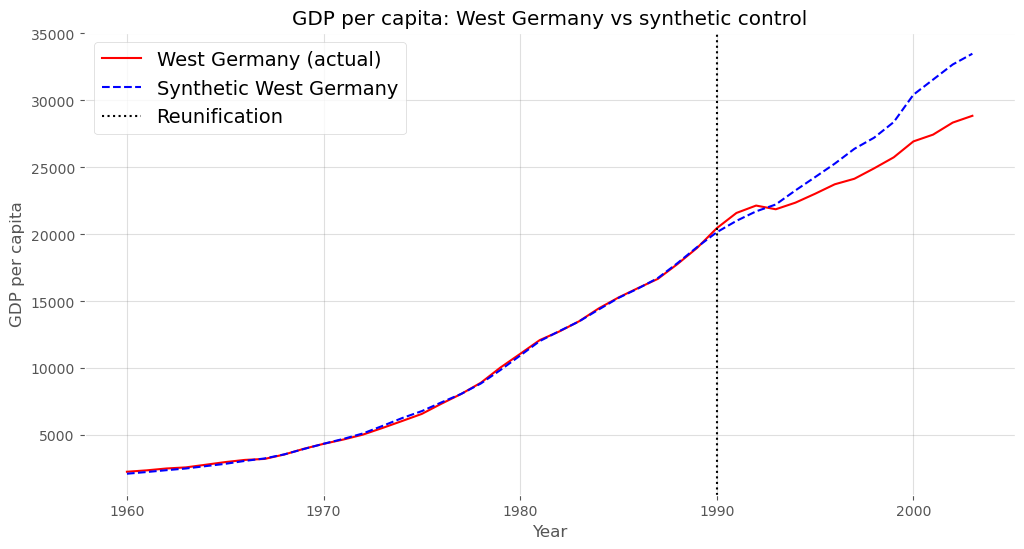

In [62]:
plt.figure(figsize=(12,6))
plt.plot(years, actual_gdp, label='West Germany (actual)', color='red')
plt.plot(years, synthetic_gdp, label='Synthetic West Germany', color='blue', linestyle='--')
plt.axvline(1990, color='black', linestyle=':', label='Reunification')
plt.title('GDP per capita: West Germany vs synthetic control')
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.legend()
plt.show()

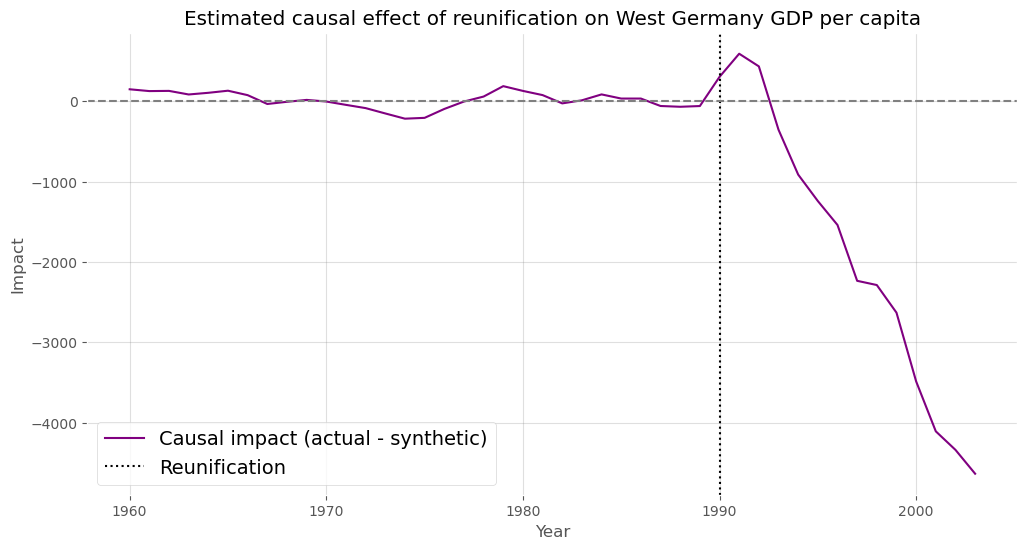

In [63]:
plt.figure(figsize=(12,6))
impact =\
(
    actual_gdp - synthetic_gdp
)
plt.plot(years, impact, color='purple', label='Causal impact (actual - synthetic)')
plt.axvline(1990, color='black', linestyle=':', label='Reunification')
plt.axhline(0, color='grey', linestyle='--')
plt.title('Estimated causal effect of reunification on West Germany GDP per capita')
plt.xlabel('Year')
plt.ylabel('Impact')
plt.legend()
plt.show()

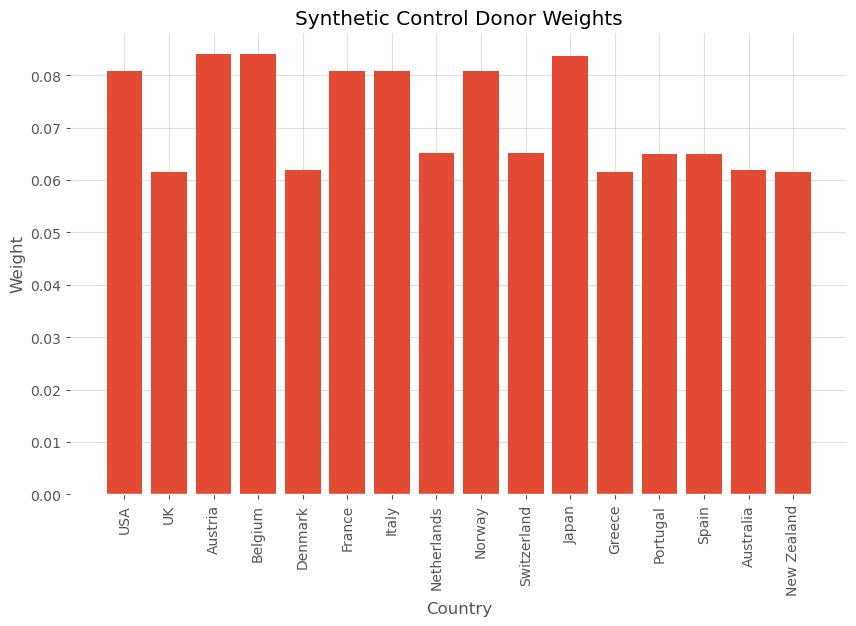

In [64]:
plt.figure(figsize=(10,6))
plt.bar(donors, weights)
plt.title('Synthetic Control Donor Weights')
plt.ylabel('Weight')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

### <font color = red> What is your econometric assessment of the causal effects? </font>

In [65]:
print("Average causal effect (post-1990):", np.mean(impact[years >= 1990]))
print("Interpretation: Negative values indicate West Germany failed to outperform its synthetic control after reunification.")

Average causal effect (post-1990): -1888.9714172505298
Interpretation: Negative values indicate West Germany failed to outperform its synthetic control after reunification.


    IMPORTANT NOTE: 

### <font color = orange> <center> Prior to submitting, ensure that you execute the following command to present your workspace.

### <font color = orange> <center> Before submission, ensure that your responses are entered into the designated cells provided for answering.

In [66]:
%whos

Variable                                      Type                        Data/Info
-----------------------------------------------------------------------------------
X                                             ndarray                     30x16: 480 elems, type `int64`, 3840 bytes
X_B                                           ndarray                     45x5: 225 elems, type `float64`, 1800 bytes
X_B_post                                      ndarray                     8x5: 40 elems, type `float64`, 320 bytes
X_full                                        ndarray                     44x16: 704 elems, type `int64`, 5632 bytes
X_post                                        ndarray                     8x15: 120 elems, type `float64`, 960 bytes
actual_gdp                                    ndarray                     44: 44 elems, type `int64`, 352 bytes
bounds                                        list                        n=16
c                                             str        

### <font color = green> 💯 Thank you for putting effort into the analytics exercise problem set 😊